<a href="https://colab.research.google.com/github/aDhiTthYAN/Web-phishing-detection/blob/main/web_phishing_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT TITLE:**WEB PHISHING DETECTION**



*   **Web phishing detection is vital for cybersecurity, aiming to identify and prevent threats from deceptive websites. Phishing involves tricking individuals into revealing sensitive information by pretending to be trustworthy. This is often done through deceptive emails, messages, or websites.**

* **To combat phishing attacks, advanced detection systems use machine learning, feature extraction, and domain analysis. These systems analyze website attributes and behaviors in real-time to find out the potential threats. By implementing such systems, organizations can protect users and their data from falling victim to phishing scams**




# **Importing** **required** **packages**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

# **Loading the dataset**
### Dataset contents



*   **URL-related features**: These include characteristics of the URL itself,
    such as length, presence of hyphens, domain, and subdomain count. These features can provide insights into the structure of the URL, which could be indicative of phishing behavior.
*   **HTML-related features:** Features like presence of titles, inputs,      buttons, images, links, etc., can provide information about the structure and content of the webpage. Phishing websites may have different HTML structures compared to legitimate ones, so these features could be informative.
*   **Text-related features:** Length of title and text, presence of headings (h1, h2, h3), number of paragraphs, etc., can provide insights into the textual content of the webpage. Phishing websites may use specific wording or formatting that differs from legitimate ones
*   **Interaction-related features:** Features like presence of forms, text areas, iframes, etc., can indicate interactive elements on the webpage. Phishing websites may use certain types of interactive elements to gather sensitive information from users.
*  **Multimedia-related features**: Presence of audio, video, images, etc., can provide insights into the multimedia content of the webpage, which could be used for distinguishing between legitimate and phishing websites.
*  **Metadata-related features**: Number of meta tags, sources, spans, tables, etc., can provide additional information about the structure and content of the webpage.










In [2]:
df = pd.read_csv("/content/phishing_detection_combined_data.csv")

In [3]:

df.head()

,URL,has_title,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,...,has_picture,number_of_sources,number_of_span,number_of_table,url_length,has_hyphens,domain,subdomain_count,Phishing_TLD,label
0,http://dng65.com,1,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,dng65.com,1,0,0
1,http://mediaroom.com,1,1,1,0,0,1,0,0,1,...,0,2,24,0,0,0,mediaroom.com,1,0,0
2,http://yieldlift.com,1,1,1,0,0,1,0,1,1,...,0,0,8,0,0,0,yieldlift.com,1,0,0
3,http://yowindow.com,1,0,0,0,0,1,0,0,0,...,0,0,8,0,0,0,yowindow.com,1,0,0
4,http://brighthorizons.com,1,1,1,0,0,1,0,0,1,...,0,0,38,0,0,0,brighthorizons.com,1,0,0


In [4]:
df.tail()

,URL,has_title,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,...,has_picture,number_of_sources,number_of_span,number_of_table,url_length,has_hyphens,domain,subdomain_count,Phishing_TLD,label
26580,http://www.vivcsiiaaaicca.vicsvesai.lzvsi5.icu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,www.vivcsiiaaaicca.vicsvesai.lzvsi5.icu,3,0,1
26581,http://lightwidget.com,1,1,1,0,0,1,0,0,0,...,1,10,0,0,0,0,lightwidget.com,1,0,0
26582,http://agora.io,1,0,1,0,0,1,0,0,0,...,0,0,19,0,0,0,agora.io,1,0,0
26583,http://lnk.bio,1,0,1,0,0,1,0,0,0,...,1,10,20,0,0,0,lnk.bio,1,0,0
26584,http://www.macesareod.bwlrdn.icu/page1.php,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,www.macesareod.bwlrdn.icu,2,0,1


In [5]:
df.rename(columns={'url_length': 'url_length_greater_than_54'}, inplace=True)

In [6]:
df.rename(columns={'Phishing_TLD': 'has_Phishing_TLD'}, inplace=True)

In [7]:
df.drop('domain',inplace=True,axis=1)

*  **In these codes i have done small steps i have renamed the column name url_length to url_length_greater_than_54**
*  **And also i have changed the column name of Phishing_TLD**
*  **And also i have removed the column domain beacause it is a categorical column and it is not that relavant ,we have extracted other details of the domain,so we are dropping the column domain**

In [8]:
df[['URL', 'has_input', 'has_button', 'has_image',
       'has_submit', 'has_link', 'has_password', 'has_email_input',
       'has_hidden_element', 'has_audio', 'has_video', 'number_of_inputs',
       'number_of_buttons', 'number_of_images', 'number_of_option',
       'number_of_list', 'number_of_th', 'number_of_tr', 'number_of_href','number_of_paragraph', 'number_of_script']].describe()

,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,has_audio,has_video,number_of_inputs,number_of_buttons,number_of_images,number_of_option,number_of_list,number_of_th,number_of_tr,number_of_href,number_of_paragraph,number_of_script
count,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000
mean,0.413617,0.392703,0.009216,0.129848,0.579124,0.047207,0.076208,0.201730,0.003235,0.049953,3.666015,4.158661,0.066617,6.114313,57.014933,0.297875,1.427647,10.327704,17.784691,12.673876
std,0.492491,0.488361,0.095557,0.336142,0.493709,0.212085,0.265336,0.401299,0.056785,0.217852,13.541662,19.149299,2.873912,97.717824,154.977610,5.247308,13.900155,18.297292,56.325823,22.851643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,6.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,68.000000,0.000000,0.000000,15.000000,18.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,616.000000,1219.000000,334.000000,13418.000000,9312.000000,391.000000,622.000000,785.000000,2515.000000,1613.000000


In [9]:
df[['number_of_span', 'number_of_table',
       'url_length_greater_than_54', 'has_hyphens',
       'subdomain_count', 'has_Phishing_TLD' ,'label']].describe()

,number_of_span,number_of_table,url_length_greater_than_54,has_hyphens,subdomain_count,has_Phishing_TLD,label
count,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000
mean,57.389806,0.414933,0.241301,0.200301,1.657438,0.178146,0.395862
std,245.986376,4.602446,0.427881,0.400233,0.892998,0.382642,0.489044
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
max,25606.000000,286.000000,1.000000,1.000000,6.000000,1.000000,1.000000


In [10]:
df[['length_of_title', 'has_h1',
       'has_h2', 'has_h3', 'length_of_text', 'number_of_clickable_button',
       'number_of_a', 'number_of_img', 'number_of_div', 'number_of_figure',
       'has_footer', 'has_form', 'has_text_area', 'has_iframe',
       'has_text_input', 'number_of_meta', 'has_nav', 'has_object',
       'has_picture', 'number_of_sources']].describe()

,length_of_title,has_h1,has_h2,has_h3,length_of_text,number_of_clickable_button,number_of_a,number_of_img,number_of_div,number_of_figure,has_footer,has_form,has_text_area,has_iframe,has_text_input,number_of_meta,has_nav,has_object,has_picture,number_of_sources
count,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000
mean,25.613353,0.384427,0.426030,0.363626,5408.982471,1.536280,106.908031,26.339364,162.167500,2.118601,0.370547,0.363212,0.027685,0.251495,0.280685,9.764491,0.357532,0.004326,0.113861,6.438631
std,29.541155,0.486469,0.494507,0.481052,12813.100036,12.543582,270.958896,68.465269,322.668585,13.864411,0.482960,0.480934,0.164071,0.433881,0.449342,29.330174,0.479282,0.065629,0.317649,41.496963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.000000,0.000000,0.000000,1167.000000,0.000000,19.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,1.000000,1.000000,7005.000000,0.000000,138.000000,29.000000,213.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,16.000000,1.000000,0.000000,0.000000,0.000000
max,394.000000,1.000000,1.000000,1.000000,649144.000000,1189.000000,22838.000000,3571.000000,15241.000000,852.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2881.000000,1.000000,1.000000,1.000000,1727.000000


In [11]:
df[['number_of_span', 'number_of_table',
       'url_length_greater_than_54', 'has_hyphens',
       'subdomain_count', 'has_Phishing_TLD' ,'label']].describe()

,number_of_span,number_of_table,url_length_greater_than_54,has_hyphens,subdomain_count,has_Phishing_TLD,label
count,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000
mean,57.389806,0.414933,0.241301,0.200301,1.657438,0.178146,0.395862
std,245.986376,4.602446,0.427881,0.400233,0.892998,0.382642,0.489044
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
max,25606.000000,286.000000,1.000000,1.000000,6.000000,1.000000,1.000000


In [12]:
df.columns

Index(['URL', 'has_title', 'has_input', 'has_button', 'has_image',
       'has_submit', 'has_link', 'has_password', 'has_email_input',
       'has_hidden_element', 'has_audio', 'has_video', 'number_of_inputs',
       'number_of_buttons', 'number_of_images', 'number_of_option',
       'number_of_list', 'number_of_th', 'number_of_tr', 'number_of_href',
       'number_of_paragraph', 'number_of_script', 'length_of_title', 'has_h1',
       'has_h2', 'has_h3', 'length_of_text', 'number_of_clickable_button',
       'number_of_a', 'number_of_img', 'number_of_div', 'number_of_figure',
       'has_footer', 'has_form', 'has_text_area', 'has_iframe',
       'has_text_input', 'number_of_meta', 'has_nav', 'has_object',
       'has_picture', 'number_of_sources', 'number_of_span', 'number_of_table',
       'url_length_greater_than_54', 'has_hyphens', 'subdomain_count',
       'has_Phishing_TLD', 'label'],
      dtype='object')

In [13]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()


In [14]:
corr

,has_title,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,has_audio,...,has_object,has_picture,number_of_sources,number_of_span,number_of_table,url_length_greater_than_54,has_hyphens,subdomain_count,has_Phishing_TLD,label
has_title,1.000000,0.678910,0.649508,0.075931,0.314939,0.927937,0.176146,0.233957,0.406400,0.044047,...,0.035387,0.292459,0.127202,0.190005,0.073566,-0.669144,-0.471126,-0.882411,-0.542303,-0.902689
has_input,0.678910,1.000000,0.634965,0.065275,0.459951,0.669257,0.265031,0.341984,0.598553,0.053035,...,0.036583,0.224341,0.118470,0.206419,0.079217,-0.456687,-0.332158,-0.613969,-0.374052,-0.635181
has_button,0.649508,0.634965,1.000000,0.092528,0.108935,0.679128,0.171118,0.297666,0.348171,0.054567,...,0.044410,0.349254,0.159452,0.195579,-0.004149,-0.440358,-0.318153,-0.587631,-0.357881,-0.607303
has_image,0.075931,0.065275,0.092528,1.000000,-0.002123,0.080623,0.028648,0.034611,0.037841,0.029168,...,0.011638,0.048461,0.010089,0.032516,-0.001254,-0.052550,-0.040399,-0.070564,-0.041816,-0.072434
has_submit,0.314939,0.459951,0.108935,-0.002123,1.000000,0.272195,0.194725,0.210426,0.427111,0.011495,...,0.012051,0.042259,0.016857,0.078336,0.099998,-0.212623,-0.157260,-0.284151,-0.169321,-0.297594
has_link,0.927937,0.669257,0.679128,0.080623,0.272195,1.000000,0.176105,0.241982,0.375199,0.048565,...,0.045742,0.305343,0.132264,0.197915,0.067455,-0.643195,-0.455711,-0.854999,-0.522438,-0.880987
has_password,0.176146,0.265031,0.171118,0.028648,0.194725,0.176105,1.000000,0.259600,0.292513,0.024801,...,0.044784,0.002850,-0.005755,0.078510,0.086950,-0.098587,-0.075947,-0.156131,-0.098533,-0.126867
has_email_input,0.233957,0.341984,0.297666,0.034611,0.210426,0.241982,0.259600,1.000000,0.277779,0.028576,...,0.035072,0.147424,0.088499,0.080793,0.003153,-0.146076,-0.113991,-0.208602,-0.129647,-0.206407
has_hidden_element,0.406400,0.598553,0.348171,0.037841,0.427111,0.375199,0.292513,0.277779,1.000000,0.042343,...,0.028281,0.105456,0.038276,0.120143,0.077734,-0.274958,-0.196783,-0.368109,-0.223757,-0.382008
has_audio,0.044047,0.053035,0.054567,0.029168,0.011495,0.048565,0.024801,0.028576,0.042343,1.000000,...,0.046713,0.033801,0.006071,0.044958,0.029983,-0.030580,-0.023546,-0.041200,-0.026523,-0.043406


*   **Above is the CORRELATION details of all the features with this we can find out which features is more positively correalted and which  is more negatively correlated**

In [15]:
positive_corr_matrix = corr[corr > 0]
negative_corr_matrix = corr[corr < 0]

# **Heatmap of positively correalted features**

<Axes: >

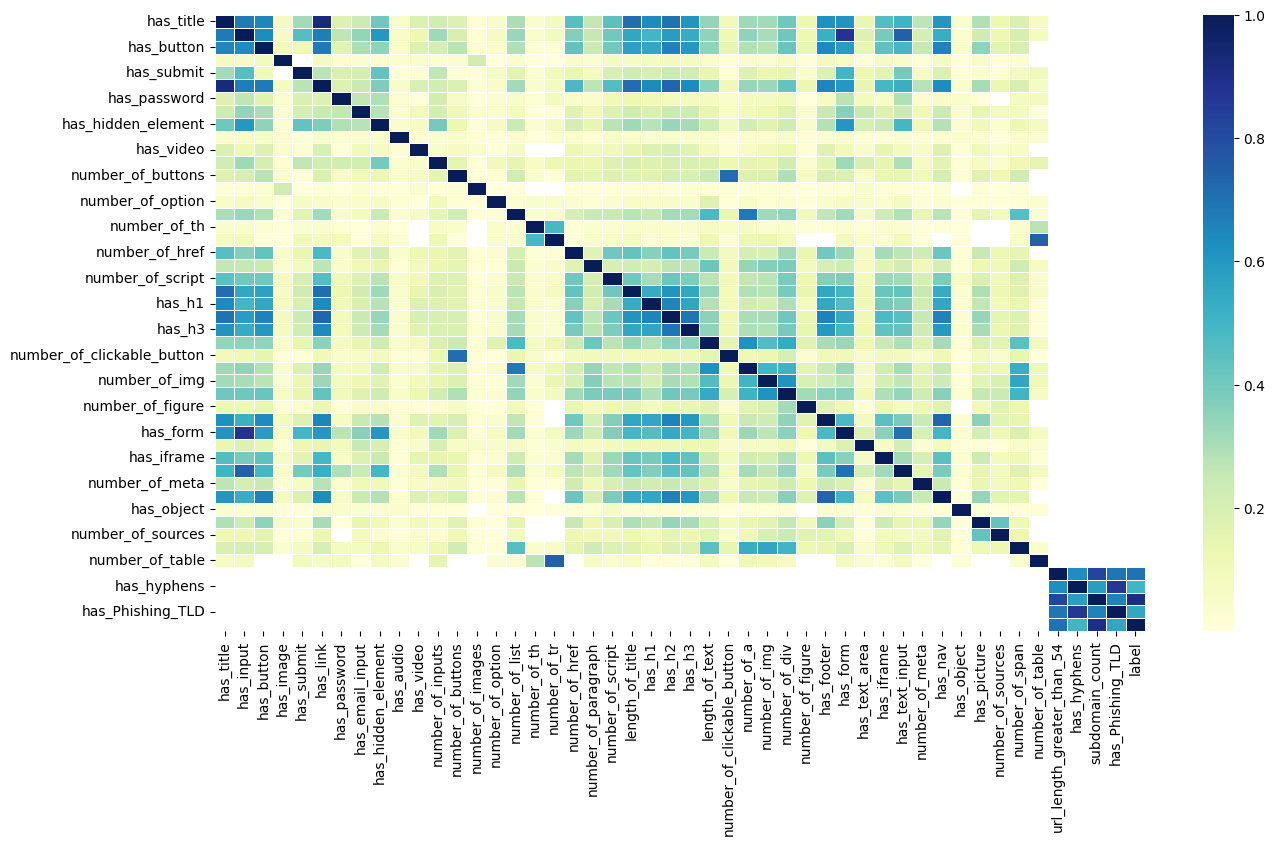

In [16]:
plt.figure(figsize=(15,8))


sns.heatmap(positive_corr_matrix, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=0.5)



# **Heatmap of Negatively correlated features**

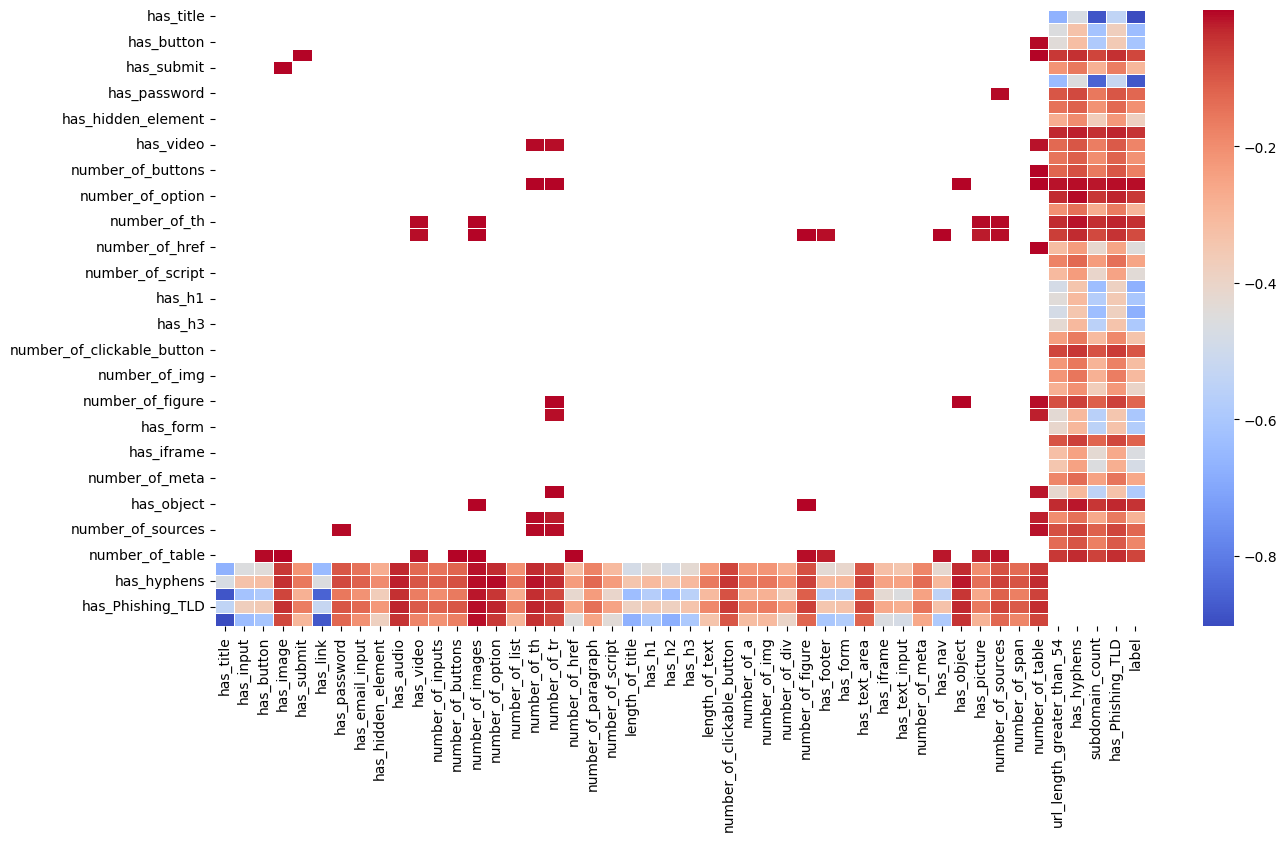

In [17]:
plt.figure(figsize=(15, 8))  # Adjust the size as needed

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(negative_corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Show plot
plt.show()


In [18]:
thershold = 0.9

def find_highly_correlated_pairs(correlation_matrix,threshold):
  correlated = []

  for i in range(len(corr.columns)):
    for j in range(i+1,len(corr.columns)):
      if  abs(corr.iloc[i,j]) > thershold:
        correlated.append((corr.columns[i],corr.columns[j]))
  return correlated



high_corr_pairs = find_highly_correlated_pairs(corr,thershold)

for pair in high_corr_pairs:
  print(pair)

('has_title', 'has_link')
('has_title', 'label')
('subdomain_count', 'label')


*    **In this we are finding out which features are more positively correlated to each other we will be removing the one feature from the dataset**  
*   **We remove positively correlated features in order to prevent redundancy and overfitting in the machine learning model. By eliminating features that convey similar information, we ensure that the model focuses on the most relevant and distinct aspects of the data, enhancing its generalization capability**

In [19]:

df.drop("has_title",inplace=True,axis=1)

#  **Data Story**:



*  **There is a hign correlation between the has_link and has_title so we decided to drop one column to avoid multicollinearity issues.**








# **Data Cleaning and Preprocessing**

#**isnull ().sum()**
* This function is used to get the sum of all null values in the dataset




In [20]:
df.isnull().sum()

URL                           0
has_input                     0
has_button                    0
has_image                     0
has_submit                    0
has_link                      0
has_password                  0
has_email_input               0
has_hidden_element            0
has_audio                     0
has_video                     0
number_of_inputs              0
number_of_buttons             0
number_of_images              0
number_of_option              0
number_of_list                0
number_of_th                  0
number_of_tr                  0
number_of_href                0
number_of_paragraph           0
number_of_script              0
length_of_title               0
has_h1                        0
has_h2                        0
has_h3                        0
length_of_text                0
number_of_clickable_button    0
number_of_a                   0
number_of_img                 0
number_of_div                 0
number_of_figure              0
has_foot



* **There is no null values in any columns so we don't need to take any measures to deal with that**




In [21]:
df.duplicated().value_counts()

False    26585
Name: count, dtype: int64

*  **By this we can confirm that there is no duplicates in the whole dataset**

# **STATISTICAL SUMMARY of  FEATURE COLUMNS  THAT NEED SCALING**

In [22]:
df[['number_of_clickable_button', 'number_of_a', 'number_of_img', 'number_of_div',
                    'number_of_figure', 'number_of_table', 'number_of_inputs', 'number_of_buttons',
                    'number_of_images', 'number_of_option', 'number_of_list', 'number_of_th',
                    'number_of_tr', 'number_of_href', 'number_of_paragraph', 'number_of_script',
                    'number_of_span', 'number_of_sources','length_of_text','length_of_title']].describe()

,number_of_clickable_button,number_of_a,number_of_img,number_of_div,number_of_figure,number_of_table,number_of_inputs,number_of_buttons,number_of_images,number_of_option,number_of_list,number_of_th,number_of_tr,number_of_href,number_of_paragraph,number_of_script,number_of_span,number_of_sources,length_of_text,length_of_title
count,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000
mean,1.536280,106.908031,26.339364,162.167500,2.118601,0.414933,3.666015,4.158661,0.066617,6.114313,57.014933,0.297875,1.427647,10.327704,17.784691,12.673876,57.389806,6.438631,5408.982471,25.613353
std,12.543582,270.958896,68.465269,322.668585,13.864411,4.602446,13.541662,19.149299,2.873912,97.717824,154.977610,5.247308,13.900155,18.297292,56.325823,22.851643,245.986376,41.496963,12813.100036,29.541155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.000000,19.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,6.000000,3.000000,0.000000,1167.000000,15.000000
75%,0.000000,138.000000,29.000000,213.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,68.000000,0.000000,0.000000,15.000000,18.000000,18.000000,47.000000,0.000000,7005.000000,49.000000
max,1189.000000,22838.000000,3571.000000,15241.000000,852.000000,286.000000,616.000000,1219.000000,334.000000,13418.000000,9312.000000,391.000000,622.000000,785.000000,2515.000000,1613.000000,25606.000000,1727.000000,649144.000000,394.000000


In [23]:
df[['number_of_meta','subdomain_count',]].describe()

,number_of_meta,subdomain_count
count,26585.000000,26585.000000
mean,9.764491,1.657438
std,29.330174,0.892998
min,0.000000,1.000000
25%,0.000000,1.000000
50%,5.000000,1.000000
75%,16.000000,3.000000
max,2881.000000,6.000000


*  **In thus statistical summary we can see that there is huge differnce in the  data points and the data is possibly skwed**

##  **Boxplot visualization of the features**

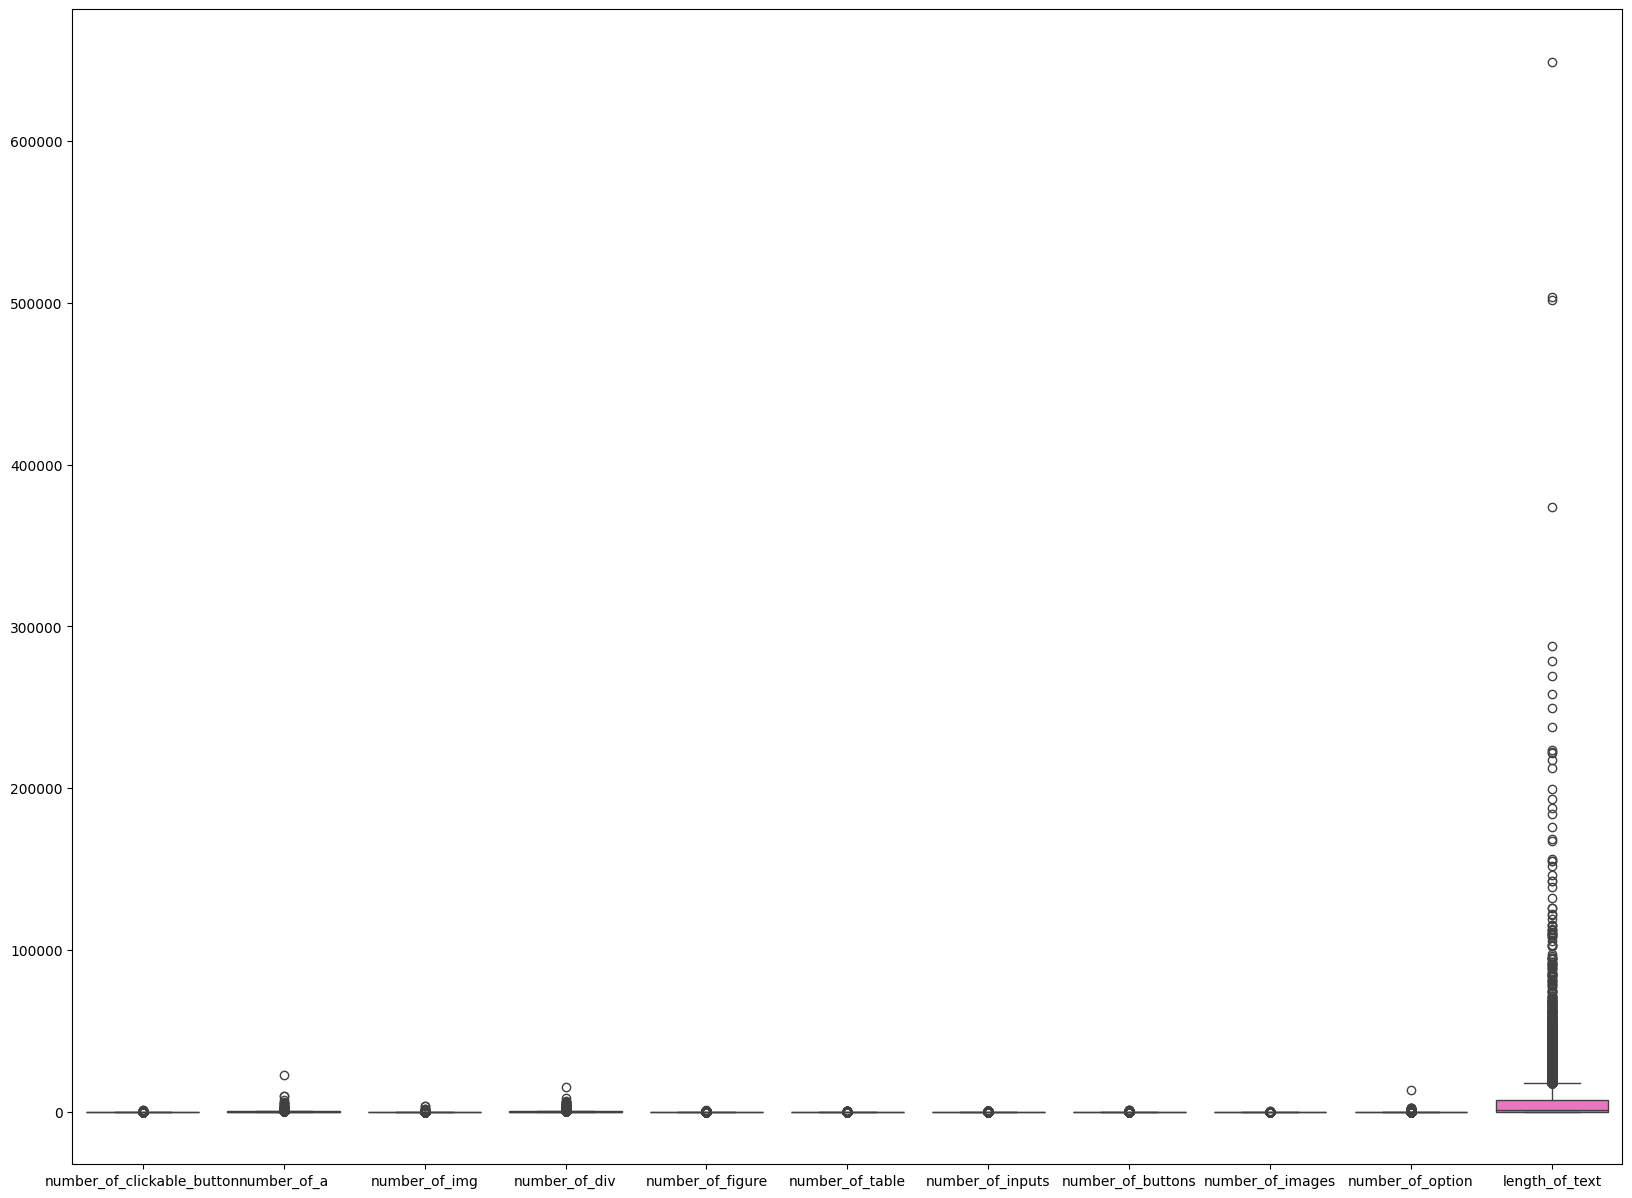

In [24]:
plt.figure(figsize=(20,15))
sns.boxplot(df[['number_of_clickable_button', 'number_of_a', 'number_of_img', 'number_of_div',
                    'number_of_figure', 'number_of_table', 'number_of_inputs', 'number_of_buttons',
                    'number_of_images', 'number_of_option','length_of_text']])
plt.show()

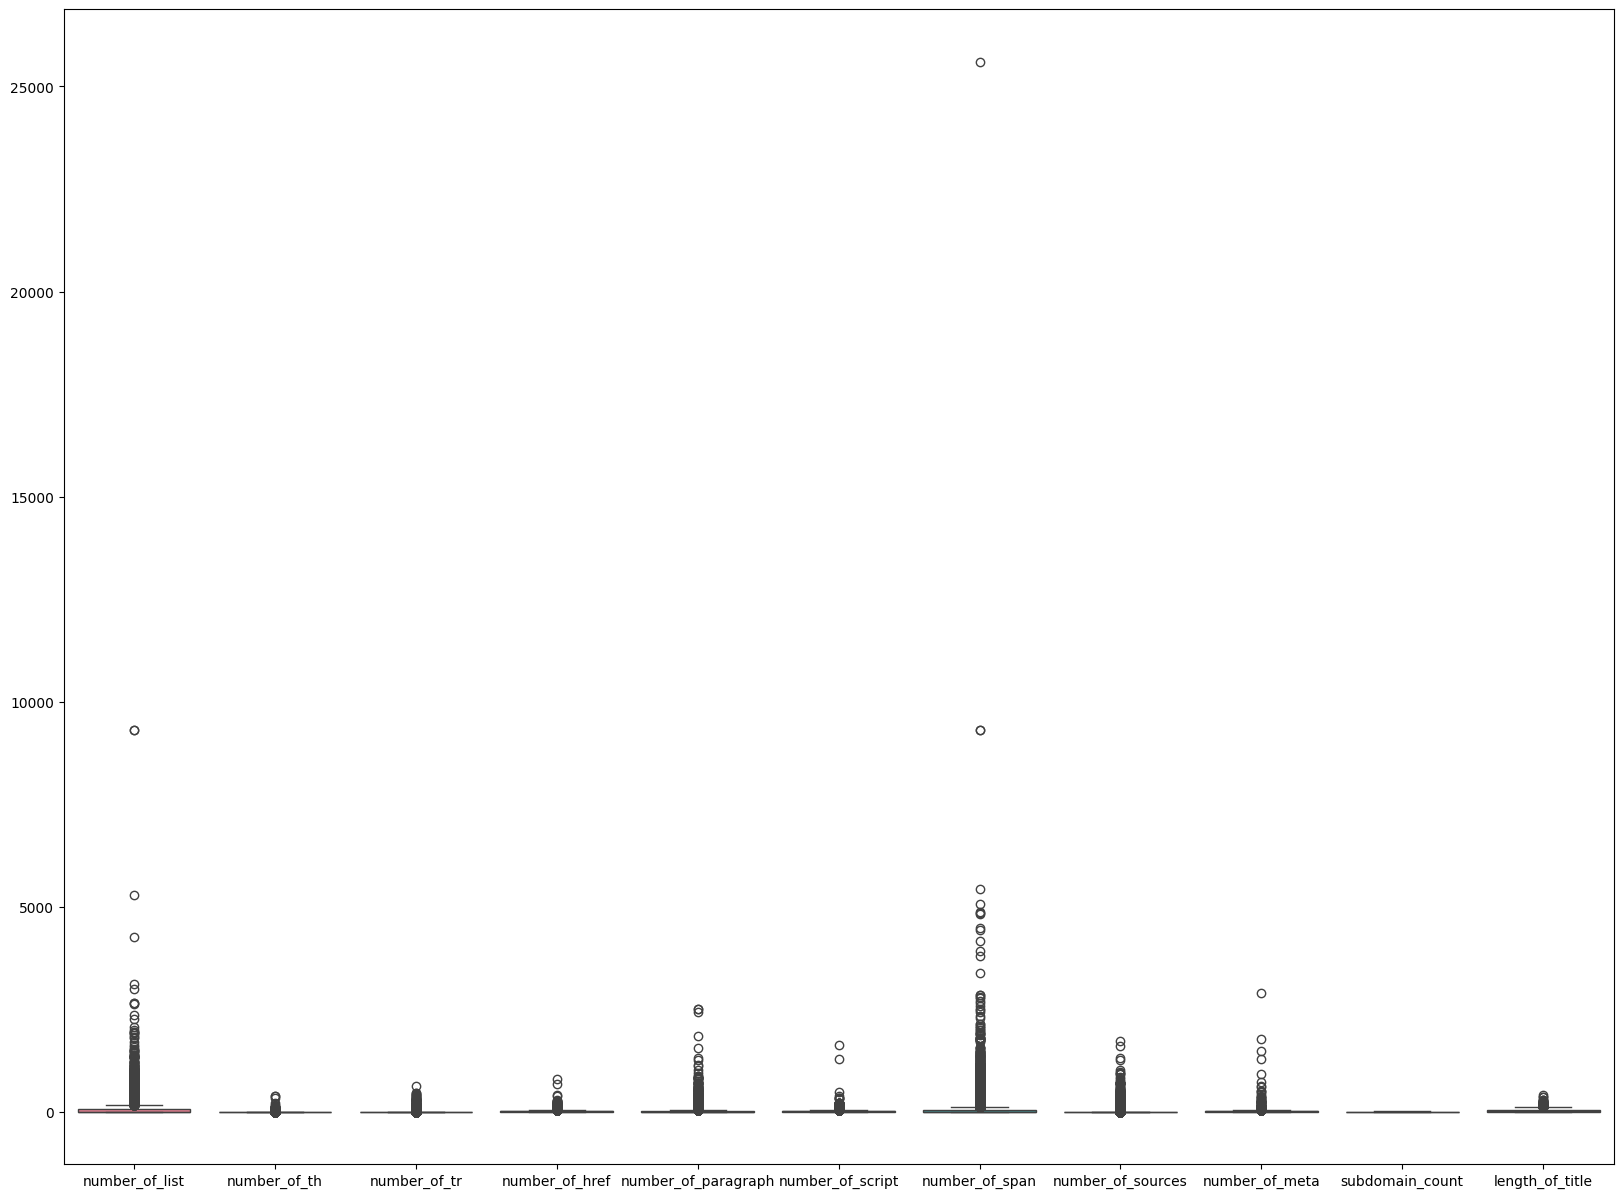

In [25]:
plt.figure(figsize=(20,15))
sns.boxplot(df[['number_of_list', 'number_of_th',
                    'number_of_tr', 'number_of_href', 'number_of_paragraph', 'number_of_script',
                    'number_of_span', 'number_of_sources','number_of_meta','subdomain_count','length_of_title']])
plt.show()

*   **In the boxplot we can see that there are so many outliers in the columns**

# **MinMaxscaling**

*   **we are going to use the MinMax scaling in the columns because**
      *     **To prepare our data for machine learning, we're applying MinMaxScaler to certain features in our dataset. This scaling technique ensures that each feature contributes equally to our model's training process, regardless of its original scale. By transforming our features to a common scale between 0 and 1, MinMaxScaler enhances the stability and convergence of our machine learning algorithms. This approach allows us to effectively capture meaningful patterns from our data without being biased by differences in feature scales. Ultimately, MinMaxScaler enables us to build a more robust and accurate predictive model**    

In [26]:
columns_to_scale = ['number_of_clickable_button', 'number_of_a', 'number_of_img', 'number_of_div',
                    'number_of_figure', 'number_of_table', 'number_of_inputs', 'number_of_buttons',
                    'number_of_images', 'number_of_option', 'number_of_list', 'number_of_th',
                    'number_of_tr', 'number_of_href', 'number_of_paragraph', 'number_of_script',
                    'number_of_span', 'number_of_sources','length_of_text','number_of_meta','subdomain_count','length_of_title']

# Initialize MinMaxScaler for all columns
scaler = MinMaxScaler()

# Scale specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

*    **After the MinMax scaling we can see that the values are in similar range 0 to 1**

In [27]:
df[['number_of_clickable_button', 'number_of_a', 'number_of_img', 'number_of_div',
                    'number_of_figure', 'number_of_table', 'number_of_inputs', 'number_of_buttons',
                    'number_of_images', 'number_of_option', 'number_of_list', 'number_of_th',
                    'number_of_tr', 'number_of_href', 'number_of_paragraph', 'number_of_script',
                    'number_of_span', 'number_of_sources','length_of_text','length_of_title']].describe()

,number_of_clickable_button,number_of_a,number_of_img,number_of_div,number_of_figure,number_of_table,number_of_inputs,number_of_buttons,number_of_images,number_of_option,number_of_list,number_of_th,number_of_tr,number_of_href,number_of_paragraph,number_of_script,number_of_span,number_of_sources,length_of_text,length_of_title
count,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000,26585.000000
mean,0.001292,0.004681,0.007376,0.010640,0.002487,0.001451,0.005951,0.003412,0.000199,0.000456,0.006123,0.000762,0.002295,0.013156,0.007071,0.007857,0.002241,0.003728,0.008332,0.065009
std,0.010550,0.011864,0.019173,0.021171,0.016273,0.016092,0.021983,0.015709,0.008605,0.007283,0.016643,0.013420,0.022348,0.023309,0.022396,0.014167,0.009607,0.024028,0.019738,0.074978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000
50%,0.000000,0.000832,0.000560,0.001772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005096,0.000398,0.003720,0.000117,0.000000,0.001798,0.038071
75%,0.000000,0.006043,0.008121,0.013975,0.000000,0.000000,0.004870,0.002461,0.000000,0.000000,0.007302,0.000000,0.000000,0.019108,0.007157,0.011159,0.001836,0.000000,0.010791,0.124365
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df[['number_of_meta','subdomain_count']].describe()

,number_of_meta,subdomain_count
count,26585.000000,26585.000000
mean,0.003389,0.131488
std,0.010181,0.178600
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.001736,0.000000
75%,0.005554,0.400000
max,1.000000,1.000000


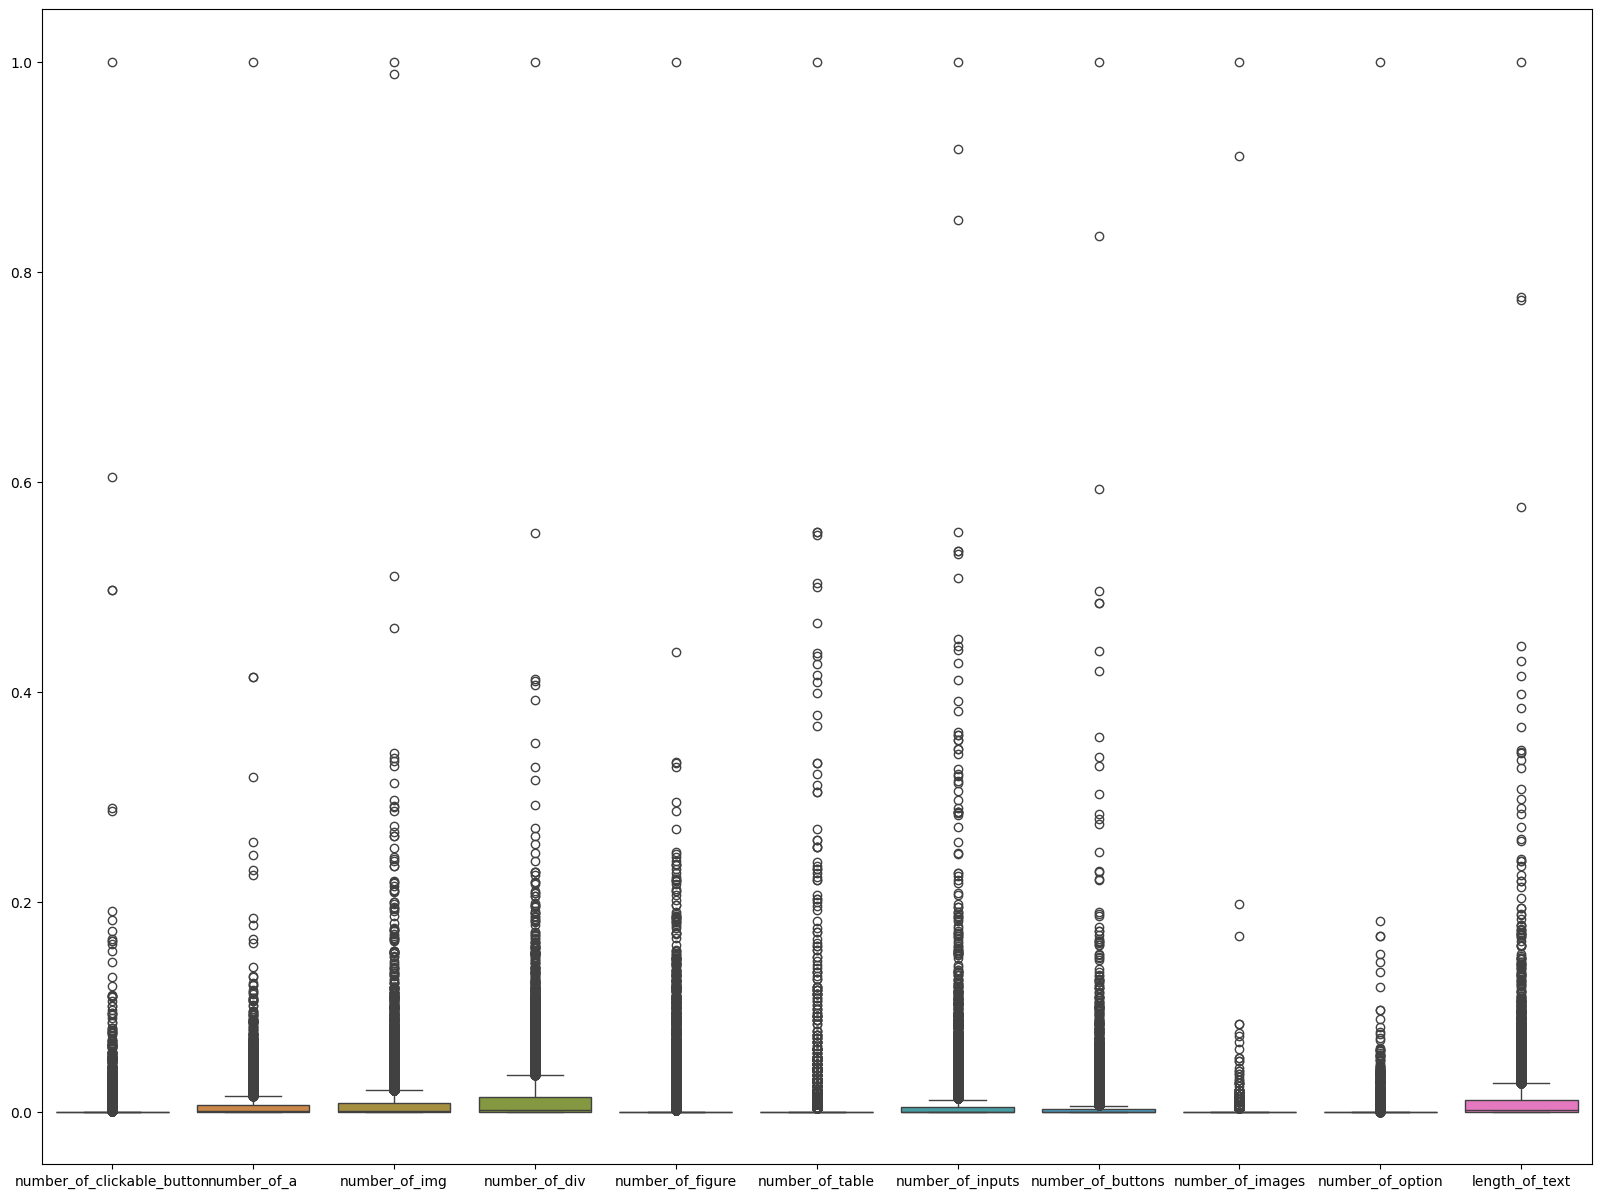

In [29]:
plt.figure(figsize=(20,15))
sns.boxplot(df[['number_of_clickable_button', 'number_of_a', 'number_of_img', 'number_of_div',
                    'number_of_figure', 'number_of_table', 'number_of_inputs', 'number_of_buttons',
                    'number_of_images', 'number_of_option','length_of_text']])
plt.show()

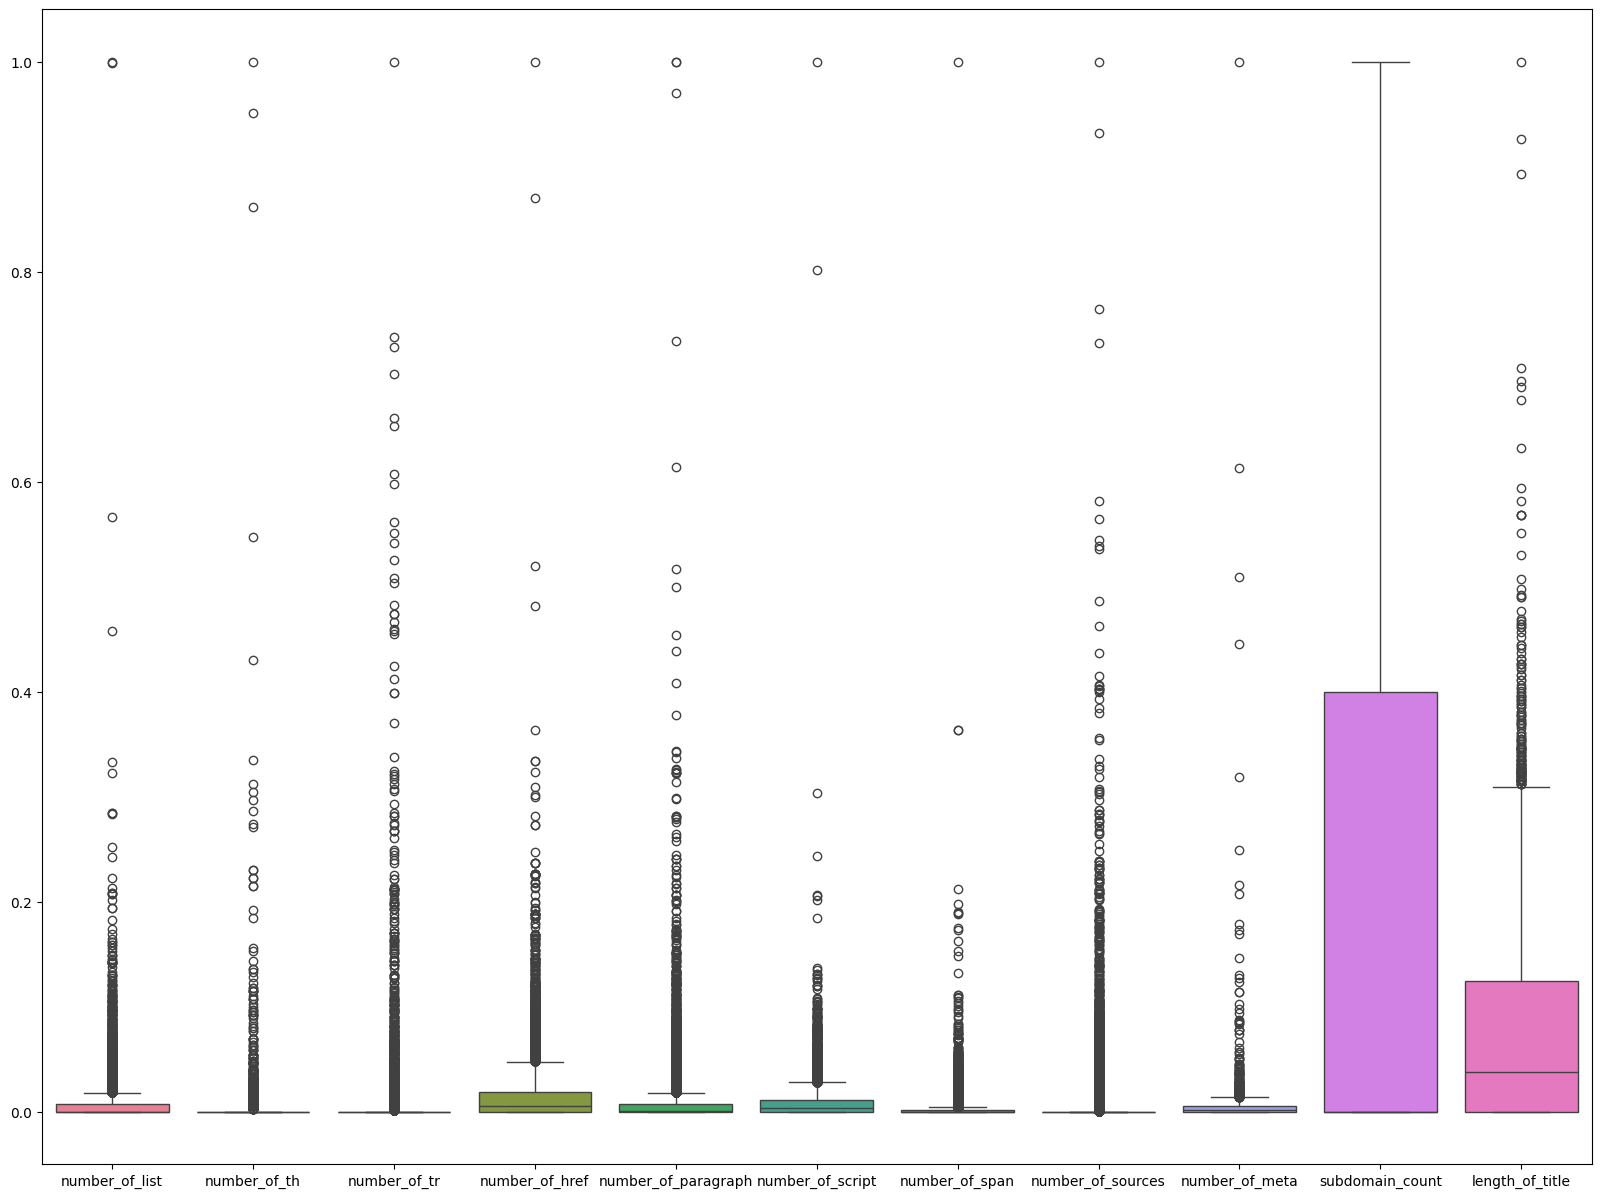

In [30]:
plt.figure(figsize=(20,15))
sns.boxplot(df[['number_of_list', 'number_of_th',
                    'number_of_tr', 'number_of_href', 'number_of_paragraph', 'number_of_script',
                    'number_of_span', 'number_of_sources','number_of_meta','subdomain_count','length_of_title']])
plt.show()

*  **In our dataset, we're encountering certain features with outliers that deviate significantly from the majority of data points. Instead of removing or transforming these outliers, we've chosen to retain them in their original form after applying MinMax scaling. By doing so, we ensure that our model captures the full range and variability of the data, including these extreme values. This decision allows our model to learn from the entire spectrum of observations, potentially uncovering valuable insights and improving its predictive performance. By preserving outliers, we maintain the richness and diversity of our dataset, enhancing the robustness and generalizability of our machine learning model.**

In [31]:
df.drop('URL',inplace=True,axis=1)

In [32]:
df

,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,has_audio,has_video,...,has_object,has_picture,number_of_sources,number_of_span,number_of_table,url_length_greater_than_54,has_hyphens,subdomain_count,has_Phishing_TLD,label
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0.000000,0.000039,0.0,0,0,0.0,0,0
1,1,1,0,0,1,0,0,1,0,1,...,0,0,0.001158,0.000937,0.0,0,0,0.0,0,0
2,1,1,0,0,1,0,1,1,0,0,...,0,0,0.000000,0.000312,0.0,0,0,0.0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0.000000,0.000312,0.0,0,0,0.0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,0,0.000000,0.001484,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26580,0,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.000000,0.0,1,0,0.4,0,1
26581,1,1,0,0,1,0,0,0,0,0,...,0,1,0.005790,0.000000,0.0,0,0,0.0,0,0
26582,0,1,0,0,1,0,0,0,0,0,...,0,0,0.000000,0.000742,0.0,0,0,0.0,0,0
26583,0,1,0,0,1,0,0,0,0,0,...,0,1,0.005790,0.000781,0.0,0,0,0.0,0,0


#  **We are creating the X and Y for training our model**

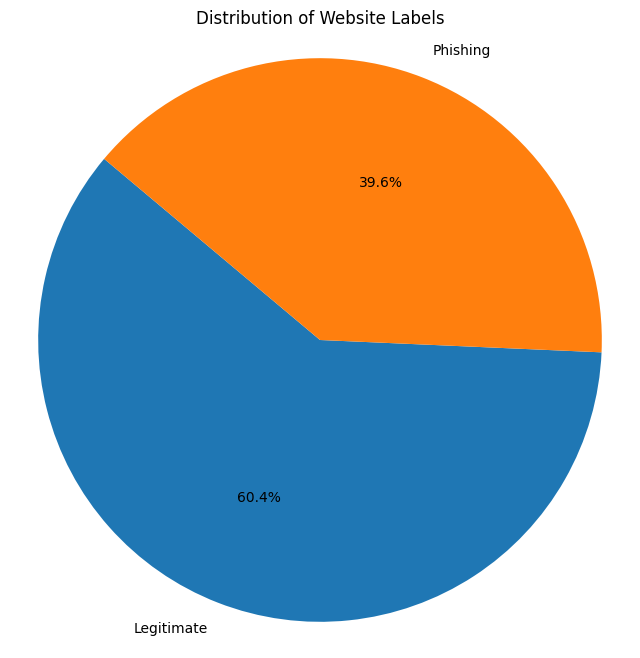

In [33]:
# Assuming your DataFrame is named df with a column named 'Label'
labels_count = df['label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(labels_count, labels=['Legitimate', 'Phishing'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Website Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

* **In the label**

    *  **0 --->Legitmate**
    *  **1 --->Phishing**
     

In [34]:
X = df.drop('label',axis= 1)# features
Y = df['label']#target variable

In [35]:
print(f"Shape of X : {X.shape}")
print(f"Shape of y : {Y.shape}")

Shape of X : (26585, 46)
Shape of y : (26585,)


# **Hyperparameter Tuning**

In [40]:
params ={
    'LogisticRegression': {'C': [0.1, 1.0, 10.0],'max_iter':[1000]},
    'DecisionTreeClassifier': {'max_depth': [None, 10, 20]},
    'RandomForestClassifier': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'GradientBoostingClassifier': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    'SVC': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'GaussianNB': {},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
}


best_params = {}
best_scores ={}

for model_name,model_params in params.items():
  model = eval(model_name)()

  Random_search = RandomizedSearchCV(estimator=model,param_distributions=model_params,cv=5,scoring='accuracy')
  Random_search.fit(X,Y)

  best_params[model_name] = Random_search.best_params_
  best_scores[model_name] = Random_search.best_score_

for model_name,params in best_params.items():
  print(f"Best parameters for {model_name}:{params}")
  print(f"Best score for {model_name}:{best_scores[model_name]}")
  print("-----------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/

Best parameters for LogisticRegression:{'max_iter': 1000, 'C': 10.0}
Best score for LogisticRegression:0.9840135414707541
-----------------------------------------------------
Best parameters for DecisionTreeClassifier:{'max_depth': 10}
Best score for DecisionTreeClassifier:0.9856309949219485
-----------------------------------------------------
Best parameters for RandomForestClassifier:{'n_estimators': 200, 'max_depth': None}
Best score for RandomForestClassifier:0.9914613503855557
-----------------------------------------------------
Best parameters for GradientBoostingClassifier:{'n_estimators': 300, 'learning_rate': 0.1}
Best score for GradientBoostingClassifier:0.9884897498589431
-----------------------------------------------------
Best parameters for SVC:{'kernel': 'rbf', 'C': 10.0}
Best score for SVC:0.9863080684596579
-----------------------------------------------------
Best parameters for GaussianNB:{}
Best score for GaussianNB:0.9415459845777694
---------------------------

* **In this step, a dictionary named params is defined, containing hyperparameter grids for various classifiers. Each key corresponds to a classifier, with the associated value being another dictionary containing the hyperparameters and their respective values to be tuned.**
*  **Empty dictionaries named best_params and best_scores are initialized to store the best parameters and corresponding scores obtained during hyperparameter tuning.**
* **Using a loop, iteration is performed over each classifier specified in params. Inside the loop:**
*  **Each classifier is dynamically instantiated using eval(model_name)().
Hyperparameter tuning is conducted using RandomizedSearchCV, which randomly samples hyperparameters from the specified distributions and performs cross-validation to identify the best combination.**
*  **After fitting the RandomizedSearchCV object on the entire dataset (X and Y), the best parameters (best_params) and best score (best_scores) obtained for each classifier are stored.**
*  **Finally, the best parameters and scores for each classifier are printed**

#   **Model Initialization and Evaluation**

*   **Based on the best Hyperparameters that we have got from the tuning we will be giving that parameters to the classifiers and then select the model which has more accuracy and after that we will train that model separately**

In [41]:


# Initialize the classifiers
models =[
     LogisticRegression(max_iter=1000,C=10.0),DecisionTreeClassifier(max_depth=10), RandomForestClassifier(n_estimators = 200, max_depth= None),GradientBoostingClassifier(n_estimators = 300,learning_rate = 0.1),SVC(kernel='linear',C=10.0),
     GaussianNB(), KNeighborsClassifier(n_neighbors= 3),AdaBoostClassifier(n_estimators=200,learning_rate= 1.0)
]

In [42]:
def compare_models():
  for model in models:

    cv_score = cross_val_score(model, X,Y,cv=5)
    mean_accuracy= sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy,2)

    print("cross validation accuracy score",model,'=',cv_score)

    print("accuracy % of the ",model,mean_accuracy)

    print('--------------------------------------')

In [43]:
compare_models()

cross validation accuracy score LogisticRegression(C=10.0, max_iter=1000) = [0.98551815 0.98363739 0.98194471 0.98326124 0.98570623]
accuracy % of the  LogisticRegression(C=10.0, max_iter=1000) 98.4
--------------------------------------
cross validation accuracy score DecisionTreeClassifier(max_depth=10) = [0.98664661 0.98401354 0.98533007 0.98608238 0.98551815]
accuracy % of the  DecisionTreeClassifier(max_depth=10) 98.55
--------------------------------------
cross validation accuracy score RandomForestClassifier(n_estimators=200) = [0.99116043 0.99172466 0.99003197 0.99172466 0.99228888]
accuracy % of the  RandomForestClassifier(n_estimators=200) 99.14
--------------------------------------
cross validation accuracy score GradientBoostingClassifier(n_estimators=300) = [0.98946774 0.98758699 0.98796314 0.98815121 0.98909159]
accuracy % of the  GradientBoostingClassifier(n_estimators=300) 98.85
--------------------------------------
cross validation accuracy score SVC(C=10.0, kernel=

* **Following hyperparameter tuning, a list named models is created, containing instances of the classifiers with the best parameters found during hyperparameter tuning.**
*  **A function named compare_models() is defined to evaluate each model using cross-validation.**
*  **Within the function, iteration is performed over each model in the models list.**
*  **For each model, the cross-validation accuracy score is calculated using cross_val_score() with 5-fold cross-validation.**
*  **The mean accuracy score across all folds, along with the cross-validation accuracy scores, is printed for each model.**
*   **From the above model comparison we got the most cross_val_score for the model RandomForestClassifier so we will be taking this model for training**

#   **RandomForestClassifier**

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

*   **Spliting the data into train test and split**

In [38]:
final_model = RandomForestClassifier(n_estimators=200, max_depth=None)


In [39]:
final_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

*   **X_train and Y_train is fitted into the final model**

# **Accuracy scores**

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
X_train_prediction = final_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print(training_data_accuracy)

0.9982132781643784


In [42]:
print(f"Accuracy on Training data : {round(training_data_accuracy*100,2)}%")

Accuracy on Training data : 99.82%


In [43]:
X_test_prediction = final_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print(test_data_accuracy)

0.9924769606921197


In [44]:
print(f"Accuracy on Test data : {round(test_data_accuracy*100,2)}%")

Accuracy on Test data : 99.25%


*   **The accuracy scores for  both the training and the test data is calculated**
*   **Accuracy measures the proportion of correct predictions made by the model over all predictions. It is calculated by dividing the number of correct predictions by the total number of predictions made.**

# **confusion matrix**

In [45]:
from sklearn.metrics import confusion_matrix


In [46]:
cf_matrix = confusion_matrix(Y_test,X_test_prediction)

print(cf_matrix)

[[3262    3]
 [  37 2015]]


In [47]:
tn,fp,fn,tp = cf_matrix.ravel()

print(tn,fp,fn,tp)

3262 3 37 2015


<Axes: >

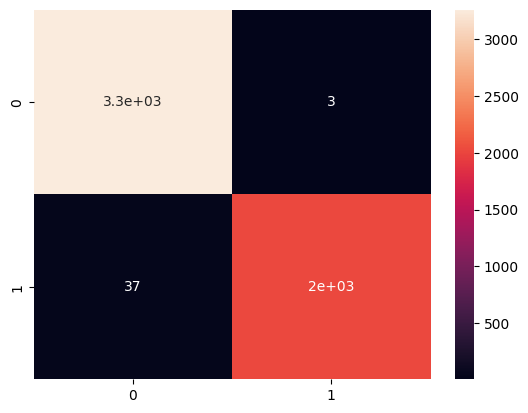

In [48]:
sns.heatmap(cf_matrix,annot=True)

*    **A confusion matrix is a table that summarizes the performance of a classification model. It presents the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It helps visualize the performance of the model across different classes.**



# **precison**

In [49]:
from sklearn.metrics import precision_score


In [50]:
#precision for training data prediction
precision_train = precision_score(Y_train,X_train_prediction)# we are giving the true labels and the labels predicted for our model
print('Training data precision=',precision_train)

Training data precision= 0.998345544788466


In [51]:
print(f"precision score  on Training data : {round(precision_train*100,2)}%")

precision score  on Training data : 99.83%


In [52]:
#precision for test data prediction
precision_test = precision_score(Y_test,X_test_prediction)# we are giving the true labels and the labels predicted for our model
print('Test data precision=',precision_test)

Test data precision= 0.9985133795837463


In [53]:
print(f"precision on Test dats : {round(precision_test*100,2)}%")

precision on Test dats : 99.85%


*  **Precision scores for both the training and the test data is calculated**
*  **Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated by dividing the number of true positive predictions by the sum of true positive and false positive predictions**

# **Recall score**

In [54]:
from sklearn.metrics import recall_score

In [55]:
#recall for training data prediction
Recall_train = recall_score(Y_train,X_train_prediction)# we are giving the true labels and the labels predicted for our model
print('Training data recall score=',Recall_train)

Training data recall score= 0.9971671388101983


In [56]:
print(f"Recall score on Training data : {round(Recall_train*100,2)}%")

Recall score on Training data : 99.72%


In [57]:
#precision for test data prediction
Recall_test = recall_score(Y_test,X_test_prediction)# we are giving the true labels and the labels predicted for our model
print('Recall score on Test data =',Recall_test)

Recall score on Test data = 0.9819688109161794


In [58]:
print(f"Recall score on Test data : {round(Recall_test*100,2)}%")

Recall score on Test data : 98.2%


*   **Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that are correctly predicted by the model. It is calculated by dividing the number of true positive predictions by the sum of true positive and false negative predictions.**

#  **F1 score**

In [59]:
from sklearn.metrics import f1_score

In [60]:
#f1 score for training data prediction
f1_score_train = f1_score(Y_train,X_train_prediction)# we are giving the true labels and the labels predicted for our model
print('Training data f1 score=',f1_score_train)

Training data f1 score= 0.9977559938585094


In [61]:
print(f"f1  score on Training data : {round(f1_score_train*100,2)}%")

f1  score on Training data : 99.78%


In [62]:
#f1 for test data prediction
f1_score_test = f1_score(Y_test,X_test_prediction)# we are giving the true labels and the labels predicted for our model
print('f1 score on Test data =',f1_score_test)

f1 score on Test data = 0.9901719901719902


In [63]:
print(f"f1 score on Test data : {round(f1_score_test*100,2)}%")

f1 score on Test data : 99.02%


*   **The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall by considering both false positives and false negatives. It is calculated as 2 * ((precision * recall) / (precision + recall)), where precision is the proportion of true positive predictions among all positive predictions, and recall is the proportion of true positive predictions among all actual positive instances**

In [67]:
# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [training_data_accuracy, precision_train, Recall_train, f1_score_train]
test_scores = [test_data_accuracy, precision_test, Recall_test, f1_score_test]

# Define train and test DataFrames
train_df = pd.DataFrame({'Metrics': metrics, 'Dataset': 'Train', 'Scores': train_scores})
test_df = pd.DataFrame({'Metrics': metrics, 'Dataset': 'Test', 'Scores': test_scores})

# Concatenate train and test DataFrames
df2 = pd.concat([train_df, test_df], ignore_index=True)

# Define the custom order for the metrics column
custom_order = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Converting the 'Metrics' column to categorical with custom order
df2['Metrics'] = pd.Categorical(df2['Metrics'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the categorical 'Metrics' column
df2 = df2.sort_values(by='Metrics')

# Display the sorted DataFrame
df2


,Metrics,Dataset,Scores
0,Accuracy,Train,0.998213
4,Accuracy,Test,0.992477
1,Precision,Train,0.998346
5,Precision,Test,0.998513
2,Recall,Train,0.997167
6,Recall,Test,0.981969
3,F1 Score,Train,0.997756
7,F1 Score,Test,0.990172


*   **Above is the table with all the scores that we have got from training the RandomClassifier  model on both training and testing data**

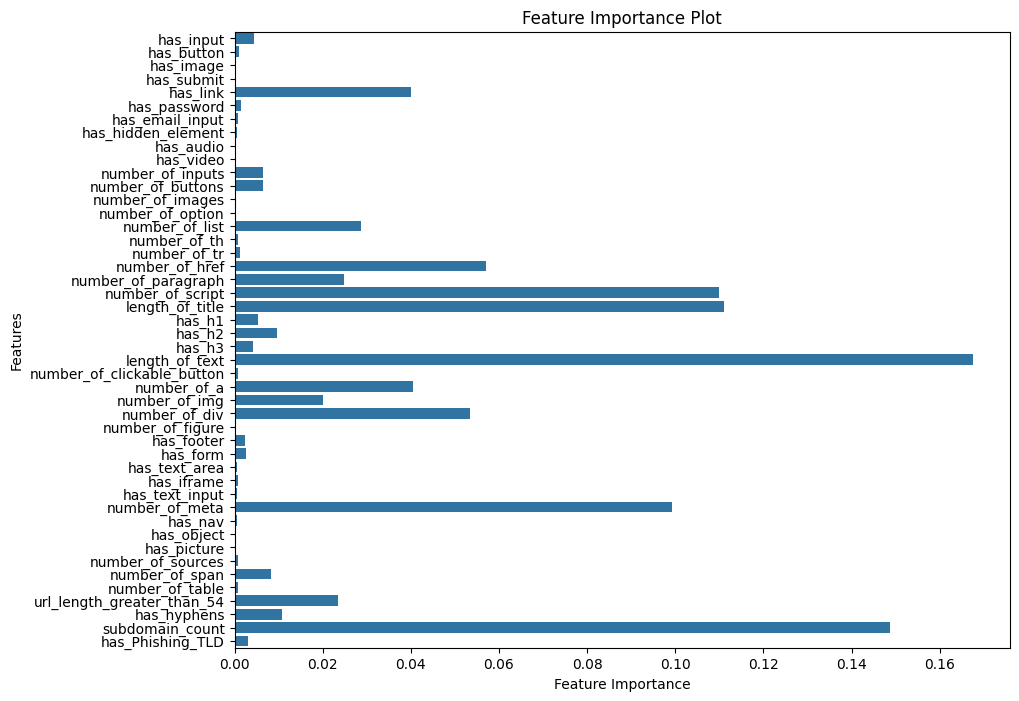

In [68]:
# Feature Importance (for RandomForestClassifier)
if isinstance(final_model, RandomForestClassifier):
    feature_importance = final_model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 8))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance Plot')
    plt.show()

*  **In this feature importance plot we will be getting the  fetaures which contribute more to this model ,using the built in function feature_importance_**

In [69]:
df.shape

(26585, 47)

# **saving the trained model**

1.2.2


In [ ]:
import joblib

In [ ]:
from joblib import dump, load

In [ ]:
# Save the trained model and scaler together
dump((final_model, scaler), "phishing_trained_model.joblib")

['phishing_trained_model.joblib']

In [ ]:
# Load the trained model and scaler together
final_model, scaler = load("phishing_trained_model.joblib")


*  **using the joblib we can save the model that we have trained using dump and load in joblib**
*  **both the final_model and the scaler are being dumped into the same joblib file named "phishing_trained_model.joblib**
   *   **This is done because both the trained model (final_model) and the scaler used for preprocessing (scaler) are necessary for making predictions on new data.**
   *  **When we deploy a machine learning model in a production environment, we typically need to have access to both the model and any preprocessing steps (such as scaling or encoding) that were applied to the training data. In this case, the scaler was used to scale the features before making predictions with the model. Therefore, it's important to save both the model and the scaler so that we can apply the same preprocessing steps to new data before making predictions with the trained model.**

#  **TESTING THE MODEL's PREDICTIONS**


*  **In this below section of the code, we're simulating the real-world scenario of testing our phishing detection model on a new URL provided by the user. The first step involves extracting various features from the URL using predefined functions like has_input, has_button, etc., which analyze the HTML content of the webpage. These features give us insights into the structure and elements present on the webpage**.

* ** Once we've extracted the features, we need to preprocess them before feeding them into our trained model. Here, we utilize a scaler function to standardize the feature values, ensuring that they are on a similar scale as those used during the model training phase. This preprocessing step is vital for maintaining consistency and ensuring that the model can make accurate predictions.**

*  **After preprocessing, the model predicts whether the input URL is likely to be a phishing attempt or a legitimate website. If the predicted label is 1, it indicates a high likelihood of the URL being a phishing attempt, while a label of 0 suggests that the URL is more likely to be from a legitimate source.**

**Overall, this process allows us to evaluate the effectiveness of our phishing detection model in identifying potentially malicious URLs and helps in safeguarding users against online threats.**

In [70]:
pip install tldextract

In [71]:
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tldextract
from urllib.parse import urlparse

# **Below is the feature extraction  steps for the new url**

In [72]:
# has_input
def has_input(soup):
    if len(soup.find_all("input")):
        return 1
    else:
        return 0


# has_button
def has_button(soup):
    if len(soup.find_all("button")) > 0:
        return 1
    else:
        return 0


# has_image
def has_image(soup):
    if len(soup.find_all("image")) == 0:
        return 0
    else:
        return 1


# has_submit
def has_submit(soup):
    for button in soup.find_all("input"):
        if button.get("type") == "submit":
            return 1
        else:
            pass
    return 0


# has_link
def has_link(soup):
    if len(soup.find_all("link")) > 0:
        return 1
    else:
        return 0


# has_password
def has_password(soup):
    for input in soup.find_all("input"):
        if (input.get("type") or input.get("name") or input.get("id")) == "password":
            return 1
        else:
            pass
    return 0


# has_email_input
def has_email_input(soup):
    for input in soup.find_all("input"):
        if (input.get("type") or input.get("id") or input.get("name")) == "email":
            return 1
        else:
            pass
    return 0


# has_hidden_element
def has_hidden_element(soup):
    for input in soup.find_all("input"):
        if input.get("type") == "hidden":
            return 1
        else:
            pass
    return 0


# has_audio
def has_audio(soup):
    if len(soup.find_all("audio")) > 0:
        return 1
    else:
        return 0


# has_video
def has_video(soup):
    if len(soup.find_all("video")) > 0:
        return 1
    else:
        return 0


# number_of_inputs
def number_of_inputs(soup):
    return len(soup.find_all("input"))


# number_of_buttons
def number_of_buttons(soup):
    return len(soup.find_all("button"))


# number_of_images
def number_of_images(soup):
    image_tags = len(soup.find_all("image"))
    count = 0
    for meta in soup.find_all("meta"):
        if meta.get("type") or meta.get("name") == "image":
            count += 1
    return image_tags + count


# number_of_option
def number_of_option(soup):
    return len(soup.find_all("option"))


# number_of_list
def number_of_list(soup):
    return len(soup.find_all("li"))


# number_of_TH
def number_of_TH(soup):
    return len(soup.find_all("th"))


# number_of_TR
def number_of_TR(soup):
    return len(soup.find_all("tr"))


# number_of_href
def number_of_href(soup):
    count = 0
    for link in soup.find_all("link"):
        if link.get("href"):
            count += 1
    return count


# number_of_paragraph
def number_of_paragraph(soup):
    return len(soup.find_all("p"))


# number_of_script
def number_of_script(soup):
    return len(soup.find_all("script"))


# length_of_title
def length_of_title(soup):
    if soup.title == None:
        return 0
    return len(soup.title.text)

# has h1
def has_h1(soup):
    if len(soup.find_all("h1")) > 0:
        return 1
    else:
        return 0


# has h2
def has_h2(soup):
    if len(soup.find_all("h2")) > 0:
        return 1
    else:
        return 0


# has h3
def has_h3(soup):
    if len(soup.find_all("h3")) > 0:
        return 1
    else:
        return 0


# length of text
def length_of_text(soup):
    return len(soup.get_text())


# number of clickable button
def number_of_clickable_button(soup):
    count = 0
    for button in soup.find_all("button"):
        if button.get("type") == "button":
            count += 1
    return count


# number of a
def number_of_a(soup):
    return len(soup.find_all("a"))


# number of img
def number_of_img(soup):
    return len(soup.find_all("img"))


# number of div class
def number_of_div(soup):
    return len(soup.find_all("div"))


# number of figures
def number_of_figure(soup):
    return len(soup.find_all("figure"))


# has footer
def has_footer(soup):
    if len(soup.find_all("footer")) > 0:
        return 1
    else:
        return 0


# has form
def has_form(soup):
    if len(soup.find_all("form")) > 0:
        return 1
    else:
        return 0


# has textarea
def has_text_area(soup):
    if len(soup.find_all("textarea")) > 0:
        return 1
    else:
        return 0


# has iframe
def has_iframe(soup):
    if len(soup.find_all("iframe")) > 0:
        return 1
    else:
        return 0


# has text input
def has_text_input(soup):
    for input in soup.find_all("input"):
        if input.get("type") == "text":
            return 1
    return 0


# number of meta
def number_of_meta(soup):
    return len(soup.find_all("meta"))


# has nav
def has_nav(soup):
    if len(soup.find_all("nav")) > 0:
        return 1
    else:
        return 0


# has object
def has_object(soup):
    if len(soup.find_all("object")) > 0:
        return 1
    else:
        return 0


# has picture
def has_picture(soup):
    if len(soup.find_all("picture")) > 0:
        return 1
    else:
        return 0


# number of sources
def number_of_sources(soup):
    return len(soup.find_all("source"))


# number of span
def number_of_span(soup):
    return len(soup.find_all("span"))


# number of table
def number_of_table(soup):
    return len(soup.find_all("table"))
def url_length_greater_than_54(url):
    if len(url) >= 54:
        return 1
    else:
        return 0

def has_hyphens(url):
    if '-' in urlparse(url).netloc:
        return 1
    else:
        return 0


def count_subdomains(url):

    ext = tldextract.extract(url)
    subdomains = ext.subdomain.split('.')
    # Return the count of subdomains
    return len(subdomains)

def mark_phishing_tld(url):
    ext = tldextract.extract(url)
    phishing_tlds = ['xyz', 'top', 'info', 'loan', 'xmr', 'ink', 'sk', 'ag', 'ryukyu', 'ltc', 'gr', 'fund', 'sx']

    # Convert both TLD and phishing_tlds list to lowercase for case-insensitive comparison
    tld = ext.suffix.lower()
    phishing_tlds = [tld.lower() for tld in phishing_tlds]

    if tld in phishing_tlds:
        return 1  # Mark as phishing
    else:
        return 0  # Mark as legitimate

In [73]:
# Define the features to be scaled
columns_to_scale = ['number_of_clickable_button', 'number_of_a', 'number_of_img', 'number_of_div',
                    'number_of_figure', 'number_of_table', 'number_of_inputs', 'number_of_buttons',
                    'number_of_images', 'number_of_option', 'number_of_list', 'number_of_th',
                    'number_of_tr', 'number_of_href', 'number_of_paragraph', 'number_of_script',
                    'number_of_span', 'number_of_sources', 'length_of_text', 'number_of_meta',
                    'subdomain_count', 'length_of_title']

*  **Out of the total 46 columns, the majority of the features are binary, while some features only have continuous values. I have mentioned in the columns_to_scale variable that we will be scaling those features**

#  **Fucntion extract the features from the new url**
    
    

*   **in the below code using the BeautifulSoup function we will be extracting the featuers from the new url and all the features extraction function is called with the soup as the argument and is stored in the unscaled_features variable**

In [74]:
def extract_features_from_url(url):
  try:
    response = requests.get(url)
    if response.status_code !=200:
      print("HTTP connection was not successful for the URL:", url)
      return None
    soup =BeautifulSoup(response.content,"html.parser")
    unscaled_features ={
    'has_input': has_input(soup),
    'has_button': has_button(soup),
    'has_image': has_image(soup),
    'has_submit': has_submit(soup),
    'has_link': has_link(soup),
    'has_password': has_password(soup),
    'has_email_input': has_email_input(soup),
    'has_hidden_element': has_hidden_element(soup),
    'has_audio': has_audio(soup),
    'has_video': has_video(soup),
    'number_of_inputs': number_of_inputs(soup),
    'number_of_buttons': number_of_buttons(soup),
    'number_of_images': number_of_images(soup),
    'number_of_option': number_of_option(soup),
    'number_of_list': number_of_list(soup),
    'number_of_th': number_of_TH(soup),
    'number_of_tr': number_of_TR(soup),
    'number_of_href': number_of_href(soup),
    'number_of_paragraph': number_of_paragraph(soup),
    'number_of_script': number_of_script(soup),
    'length_of_title': length_of_title(soup),
    'has_h1': has_h1(soup),
    'has_h2': has_h2(soup),
    'has_h3': has_h3(soup),
    'length_of_text': length_of_text(soup),
    'number_of_clickable_button': number_of_clickable_button(soup),
    'number_of_a': number_of_a(soup),
    'number_of_img': number_of_img(soup),
    'number_of_div': number_of_div(soup),
    'number_of_figure': number_of_figure(soup),
    'has_footer': has_footer(soup),
    'has_form': has_form(soup),
    'has_text_area': has_text_area(soup),
    'has_iframe': has_iframe(soup),
    'has_text_input': has_text_input(soup),
    'number_of_meta': number_of_meta(soup),
    'has_nav': has_nav(soup),
    'has_object': has_object(soup),
    'has_picture': has_picture(soup),
    'number_of_sources': number_of_sources(soup),
    'number_of_span': number_of_span(soup),
    'number_of_table': number_of_table(soup),
    'url_length_greater_than_54': url_length_greater_than_54(url_to_test),
    'has_hyphens': has_hyphens(url_to_test),
    'subdomain_count': count_subdomains(url_to_test),
    'has_Phishing_TLD': mark_phishing_tld(url_to_test)}


    return unscaled_features

  except requests.exceptions.RequestException as e:
    print("Error",e)
    return None






*  **in the below code we will be giving the url and extract the fetaures for the url and also scale the features stored in the "columns_to_scale" for the url**
* **And the scaled feature is stored in the "scaled_features_array" variable and we will be concat the "scaled_features_array" and the features that are not scaled and store in the variable "encoded_url_array"**

*  **And using the predict function we will be predicting whether the url is phishing or legitmate**

In [75]:
url_to_test = input("Enter the URL: ")

unscaled_features = extract_features_from_url(url_to_test)

if unscaled_features:
    print("Features extracted successfully:", unscaled_features)
    scaled_features_array = scaler.transform(np.array([[unscaled_features[feature] for feature in columns_to_scale]]))
    encoded_url_array = np.concatenate((scaled_features_array, np.array([[unscaled_features[feature] for feature in unscaled_features if feature not in columns_to_scale]])), axis=1)
    predicted_label = final_model.predict(encoded_url_array)

    if predicted_label == 1:
        print("Phishing URL")



    else:
        print("Legitimate URL")

else:
    print("Failed to extract features from the URL.")


Enter the URL:  https://supercard-login.eu/
Features extracted successfully: {'has_input': 1, 'has_button': 1, 'has_image': 0, 'has_submit': 0, 'has_link': 1, 'has_password': 0, 'has_email_input': 1, 'has_hidden_element': 1, 'has_audio': 0, 'has_video': 0, 'number_of_inputs': 6, 'number_of_buttons': 1, 'number_of_images': 0, 'number_of_option': 0, 'number_of_list': 4, 'number_of_th': 0, 'number_of_tr': 0, 'number_of_href': 4, 'number_of_paragraph': 2, 'number_of_script': 0, 'length_of_title': 57, 'has_h1': 0, 'has_h2': 1, 'has_h3': 0, 'length_of_text': 1218, 'number_of_clickable_button': 0, 'number_of_a': 10, 'number_of_img': 3, 'number_of_div': 40, 'number_of_figure': 0, 'has_footer': 1, 'has_form': 1, 'has_text_area': 0, 'has_iframe': 1, 'has_text_input': 1, 'number_of_meta': 15, 'has_nav': 1, 'has_object': 0, 'has_picture': 0, 'number_of_sources': 0, 'number_of_span': 17, 'number_of_table': 0, 'url_length_greater_than_54': 0, 'has_hyphens': 1, 'subdomain_count': 1, 'has_Phishing_TLD

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# https://supercard-login.eu/ ----> phishing url for checking
#https://phishtank.org/    ------> legitmate url
#	https://supercard-login.eu/------> phishing url
#	https://google-newsletters.blogspot.com/ ----phishing url
# https://google-newsletters.blogspot.ch/   ------phishing url

# http://lightwidget.com-----> legitmate
# https://claude.ai/chat/ce923264-a442-4ae3-a32c-4bdf696798b9  ------> legitmate url
# https://page-violation-review.replit.app/----> phish
# https://webapp.entri.app/skills/courses----> legit
# https://copilot.microsoft.com/ ----> legit
# https://metamask-wyllet.webflow.io/ ---> phish

*  **above is some unseen url's that are are not in the dataset that i used for training**
*  **Phishing URLs often have a short lifespan, and the model may not always extract features from them successfully, as they may have been blocked. Therefore, it is essential to use recently listed phishing URLs for predictions**